In [48]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Yogabar/Solution/data/add_review_data.csv')
df.shape

(880, 4)

In [49]:
df.sort_values("review_author", inplace=True)
df.drop_duplicates(keep = False, inplace = True)
df.shape

(860, 4)

In [69]:
df.sample(10)

,review_posted_date,review_header,review_rating,review_author,review_header_punct
836,2019-07-08,Great in taste!,5.0,PuneetWasHere,Great in taste
704,2019-10-05,Well price pack,4.0,Naveen G.,Well price pack
545,2020-06-29,Best,5.0,AMALU ANTONY,Best
575,2020-07-27,Good product,5.0,Sayanti,Good product
753,2020-08-21,Worth buying,5.0,Nishmitha,Worth buying
163,2019-12-26,Now quality has been decreased,2.0,Amazon Customer,Now quality has been decreased
408,2020-06-02,Yummy healthy snack.,5.0,Gursharan,Yummy healthy snack
184,2019-09-21,"Too sweet, that ruins the taste",2.0,amanpreet,Too sweet that ruins the taste
235,2019-07-11,Tasty and quality,5.0,indresha h r,Tasty and quality
476,2019-07-16,Amazing,5.0,Ruchi,Amazing


## Converting `review_posted_date` to `datetime` object :

In [51]:
df['review_posted_date'] = pd.to_datetime(df['review_posted_date'])

In [61]:
df.dtypes

review_posted_date     datetime64[ns]
review_header                  object
review_rating                 float64
review_author                  object
review_header_punct            object
dtype: object

In [53]:
df['review_header'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['review_header_punct'] = df['review_header'].apply(lambda x: remove_punct_emoji(x))

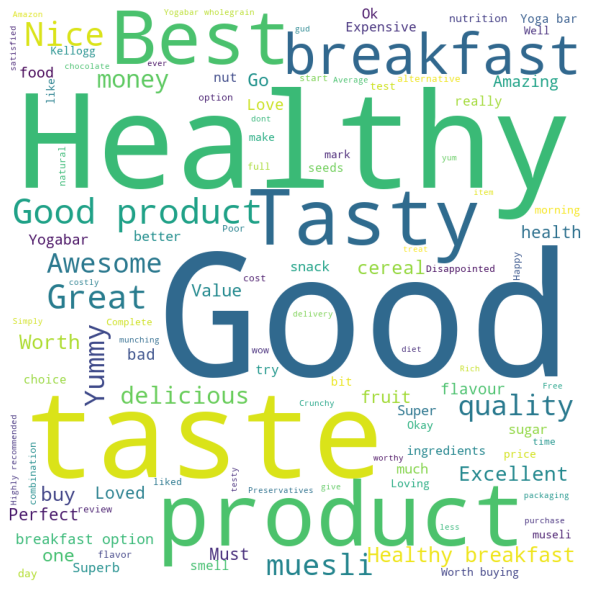

In [56]:
import nltk
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english')

# Create Wordcloud strings
review_header = " ".join(review for review in df.review_header_punct)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopword, min_font_size = 10).generate(review_header) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

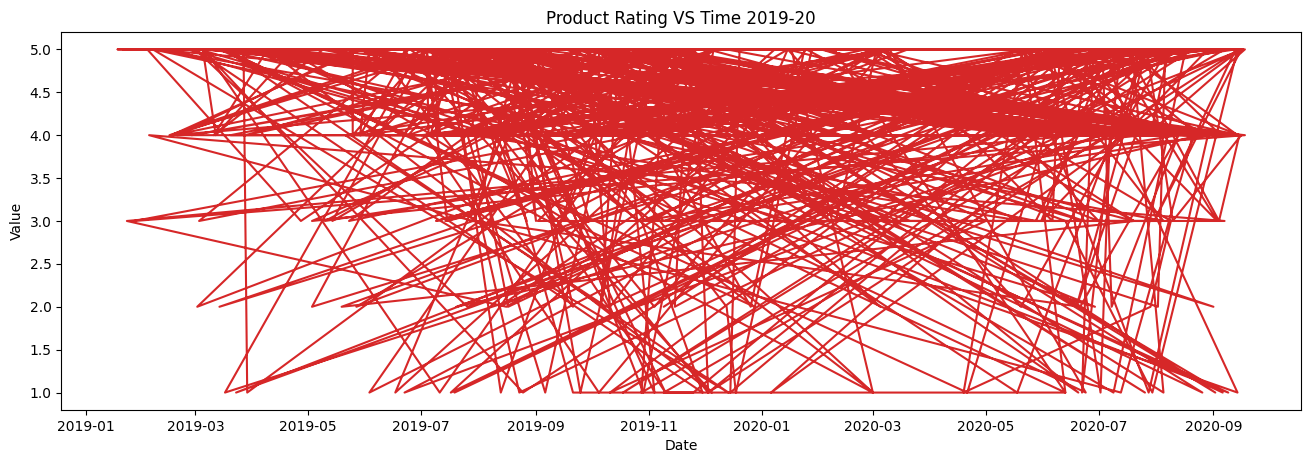

In [64]:
def plot_df(df, x, y, title = "", xlabel = 'Date', ylabel = 'Value', dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()

plot_df(df, x = df['review_posted_date'], y = df['review_rating'], title = 'Product Rating VS Time 2019-20')

In [73]:
df_time = df.copy().reindex(columns=['review_rating','review_posted_date'])

In [74]:
df_time.sample(10)

,review_rating,review_posted_date
558,5.0,2020-06-01
786,5.0,2019-08-26
780,4.0,2019-08-03
816,3.0,2019-10-28
265,5.0,2020-06-16
672,5.0,2020-03-06
121,1.0,2019-11-30
101,5.0,2020-08-08
439,1.0,2020-04-19
524,2.0,2020-06-19


In [77]:
df_time = pd.read_csv('D:/Yogabar/Solution/data/add_review_data.csv', parse_dates=['date'], index_col='date')
df_time.reindex(columns = ['review_rating', 'review_posted_date'])
df_time.reset_index(inplace = True)

# Prepare data
df_time['year'] = [d.year for d in df_time.date]
df_time['month'] = [d.strftime('%b') for d in df_time.date]
years = df_time['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df_time, ax=axes[0])
sns.boxplot(x='month', y='value', data=df_time.loc[~df_time.year.isin([2018, 2020]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

ValueError: Missing column provided to 'parse_dates': 'date'